<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Motor Vehicle Use in Australia</h1>
<h2 style="font-family:Arial;">My Vu</h2>
<h2 style="font-family:Arial;">12862177</h2>
<p><small> Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Summer 2020</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract


This project will compared Motor Vehicle between different states use in Australia.

The critical point of this report is to analyses average kilometers accross states and the national fuel consumtion by different types of vehicles.

Through the analyses, we are able to manage the right amount of fuel into the future in order to balance between the supply and demand. 

Therefore, we are able to eliminate fuel handling cost, and control the amount of pre-purchased fuel.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation</h1>

Since I was a kid, I was always wonder how the gas staion never run out of gas while there are so many motor vehicles running accross suburbs, city, states all the time. I was keep asking my mom how far would these vehicles going for and how much fuel that it comsumed every trip. And how does the gas station know how much fuel to prepare in advance. 

Hence, I think it would be very interesting to know how many kilometers travelled of all the motor vehicles and the amount of fuel consumption needed so we able to control the demand and supply of it into the future.


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>2. The data</h1>


The datasets for this project is taken from Australian Bureau of Statistics. 
There are 31 datasets that contained in an excel file. 

The link of the datasets is attached below:
(https://www.abs.gov.au/AUSSTATS/abs@.nsf/Lookup/9208.0Main+Features112%20months%20ended%2030%20June%202018?OpenDocument)



<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data preparation</h1>

31 datasets has been separeted in different sheets in an excel file.

Upon opening this dataset, I have noticed that the data was not well-labled by rows and columes. Therefore, I have done some data cleaning in excel in order perform analysis properly. However, the contents and the information of the datasets are remain the same. I have attached the cleaned datasets beside this report. 





Import all the relation packages

In [1]:
from math import *
import numpy as np
import pandas as pd
from pathlib import Path


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing


import scipy.interpolate
import matplotlib

Import dataset

In [2]:
input_path = Path('../documents/table_1.csv')
input_path2 = Path('../documents/table_2.csv')
input_path3 = Path('../documents/table_3.csv')
input_path4 = Path('../documents/table_4.csv')

Check if the dataset is properly lable

In [3]:
df = pd.read_csv(input_path)
df.head()

,Vehicle_type,Year,Total laden business kilometres travelled,Total laden business kilometres travelled - RSE,Average laden business kilometres travelled,Average laden business kilometres travelled - RSE,Total tonne-kilometres travelled,Total tonne-kilometres travelled - RSE,Average tonne-kilometres travelled,Average tonne-kilometres travelled - RSE,Total tonnes carried,Total tonnes carried - RSE,Average load carried per trip,Average load carried per trip - RSE
0,Light commercial vehicles,2010,17035.0,6.05,13.1,5.30,"7,233",8.38,5.6,7.84,161,8.80,406,5.92
1,Light commercial vehicles,2012,18496.0,6.53,13.8,5.56,"7,738",8.99,5.8,8.49,167,7.31,381,5.10
2,Light commercial vehicles,2014,18577.0,5.55,12.0,4.77,"7,676",8.12,4.9,7.32,145,6.32,353,4.43
3,Light commercial vehicles,2016,22358.0,5.86,14.7,5.01,"8,291",8.62,5.5,7.86,145,7.55,335,6.37
4,Light commercial vehicles,2018,21068.0,6.07,13.6,4.99,"9,544",7.51,6.2,6.94,164,7.41,417,5.63


Check all the types of the attributes

In [4]:
df.dtypes

Vehicle_type                                          object
Year                                                   int64
Total laden business kilometres travelled            float64
Total laden business kilometres travelled - RSE      float64
Average laden business kilometres travelled          float64
Average laden business kilometres travelled - RSE    float64
Total tonne-kilometres travelled                      object
Total tonne-kilometres travelled - RSE               float64
Average tonne-kilometres travelled                    object
Average tonne-kilometres travelled - RSE             float64
Total tonnes carried                                  object
Total tonnes carried - RSE                           float64
Average load carried per trip                         object
Average load carried per trip - RSE                  float64
dtype: object

Bar chart distribution of the kilometers travelled of freight use through years

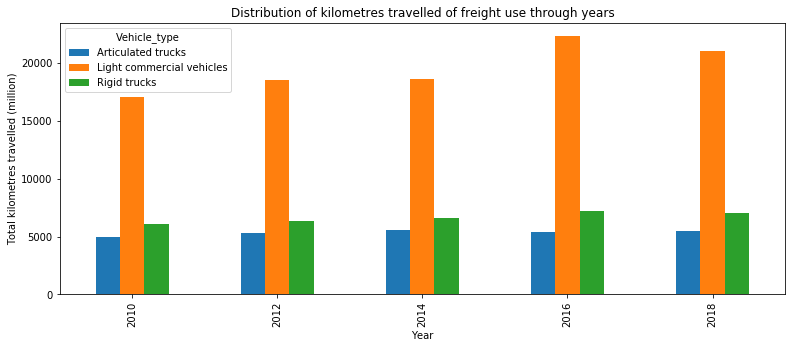

In [5]:
dist = df[df['Vehicle_type']!='Total freight vehicles'].groupby(['Year','Vehicle_type'])['Total laden business kilometres travelled'].sum().unstack()
g1 = dist.plot(kind='bar',figsize = (13,5), 
               title = "Distribution of kilometres travelled of freight use through years").set_ylabel("Total kilometres travelled (million)")

Total kilometres travelled (million) of freight use through years.

In [6]:
df[df['Vehicle_type']=='Total freight vehicles'].groupby(['Year','Vehicle_type'])['Total laden business kilometres travelled'].sum().unstack()

Vehicle_type,Total freight vehicles
Year,
2010,28114.0
2012,30130.0
2014,30809.0
2016,34942.0
2018,33567.0


Check if the dataset is properly lable

In [7]:
df2 = pd.read_csv(input_path2)
df2.head()

,Vehicle_type,Year,Total kilometres travelled,Total kilometres travelled - RSE,Number of vehicles,Number of vehicles - RSE,Average kilometres travelled,Average kilometres travelled - RSE,Fuel consumed,Fuel consumed - RSE,Rate of fuel consumption,Rate of fuel consumption - RSE
0,Passenger vehicles,2010,163360,2.66,"12,341,262",0.71,13.2,2.60,18431,3.20,11.3,1.55
1,Passenger vehicles,2012,167456,3.03,"12,684,308",0.70,13.2,2.60,18510,3.42,11.1,1.30
2,Passenger vehicles,2014,176805,3.15,"13,421,357",0.84,13.2,3.14,18893,3.63,10.7,1.12
3,Passenger vehicles,2016,175899,2.74,"13,712,810",0.70,12.8,2.64,18606,2.95,10.6,1.10
4,Passenger vehicles,2018,179761,2.44,"14,258,620",0.72,12.6,2.40,19486,2.49,10.8,1.21


In [8]:
df2.dtypes

Vehicle_type                           object
Year                                    int64
Total kilometres travelled              int64
Total kilometres travelled - RSE      float64
Number of vehicles                     object
Number of vehicles - RSE              float64
Average kilometres travelled          float64
Average kilometres travelled - RSE    float64
Fuel consumed                           int64
Fuel consumed - RSE                   float64
Rate of fuel consumption              float64
Rate of fuel consumption - RSE        float64
dtype: object

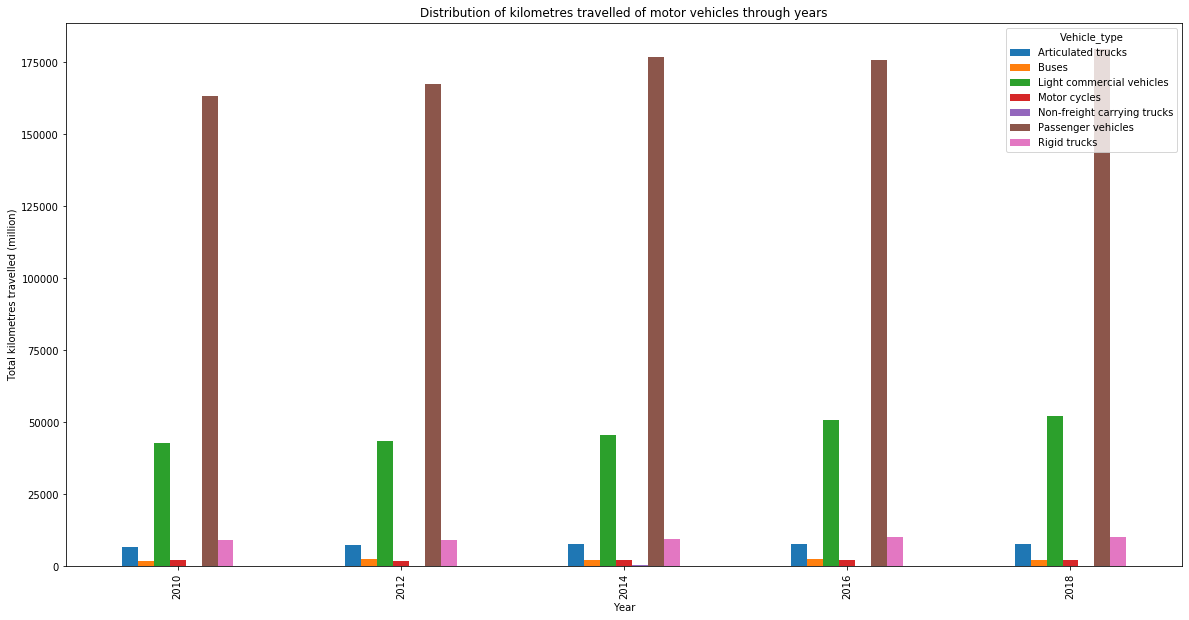

In [9]:
dist2 = df2[df2['Vehicle_type']!='Total'].groupby(['Year','Vehicle_type'])['Total kilometres travelled'].sum().unstack()
g2 = dist2.plot(kind='bar',figsize = (20,10), 
               title = "Distribution of kilometres travelled of motor vehicles through years").set_ylabel("Total kilometres travelled (million)")

In [10]:
df2[df2['Vehicle_type']=='Passenger vehicles'].groupby(['Year','Vehicle_type'])['Total kilometres travelled'].sum().unstack()

Vehicle_type,Passenger vehicles
Year,
2010,163360
2012,167456
2014,176805
2016,175899
2018,179761


Total kilometres travelled (million) of motor vehicles through years.

In [11]:
df2[df2['Vehicle_type']=='Total'].groupby(['Year','Vehicle_type'])['Total kilometres travelled'].sum().unstack()

Vehicle_type,Total
Year,
2010,226632
2012,232453
2014,244369
2016,249512
2018,255031


In [12]:
total_fuel_motor = df2[df2['Vehicle_type']!='Total'].pivot_table('Fuel consumed', index='Year', columns='Vehicle_type', aggfunc=sum)

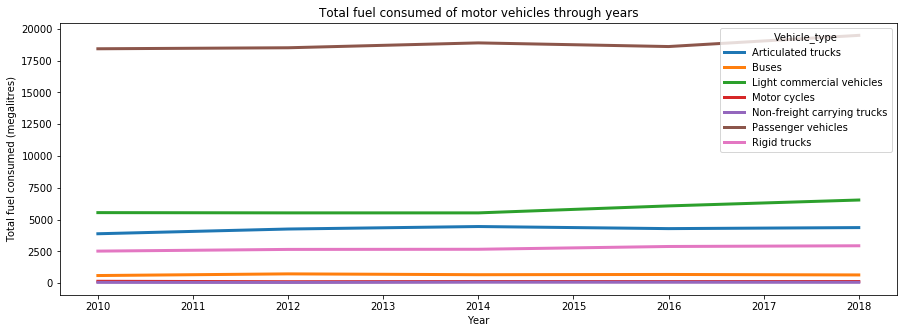

In [13]:
total_fuel_motor.plot(figsize=(15, 5), 
                  title="Total fuel consumed of motor vehicles through years", 
                  lw=3,  
                  alpha=1).set_ylabel("Total fuel consumed (megalitres)");

Total fuel consumed (megalitres) of motor vehicles through years

In [14]:
df2[df2['Vehicle_type']=='Total'].groupby(['Year','Vehicle_type'])['Fuel consumed'].sum().unstack()

Vehicle_type,Total
Year,
2010,31186
2012,31839
2014,32402
2016,32732
2018,34170


In [190]:
df2.Vehicle_type = df2.Vehicle_type.astype('category')

Check if the dataset is properly lable

In [15]:
df3 = pd.read_csv(input_path3)
df3.head()

,State,Year,Total kilometres travelled,Total kilometres travelled - RSE,Number_of_vehicles,Number of vehicles - RSE,Average kilometres travelled,Average kilometres travelled - RSE
0,New South Wales,2010,66581.0,4.74,4673192.0,1.29,14.2,4.55
1,New South Wales,2012,66712.0,4.35,4839152.0,1.26,13.8,4.37
2,New South Wales,2014,72154.0,4.07,5105929.0,1.22,14.1,3.99
3,New South Wales,2016,70696.0,3.87,5333001.0,1.06,13.3,3.80
4,New South Wales,2018,74566.0,4.10,5586547.0,1.39,13.3,4.16


In [16]:
df3.State = df3.State.astype('object')
df3.Year = df3.Year.astype('int64')
df3.dtypes

State                                  object
Year                                    int64
Total kilometres travelled            float64
Total kilometres travelled - RSE      float64
Number_of_vehicles                    float64
Number of vehicles - RSE              float64
Average kilometres travelled          float64
Average kilometres travelled - RSE    float64
dtype: object

In [17]:
num_motor_vehicles = df3[df3['State']!='Australia'].pivot_table('Number_of_vehicles', index='Year', columns='State', aggfunc=sum)

In [18]:
num_motor_vehicles

State,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
Year,,,,,,,,
2010,252771.0,4673192.0,133700.0,3362083.0,1233241.0,409949.0,4108442.0,1871679.0
2012,265327.0,4839152.0,141257.0,3436008.0,1270552.0,424035.0,4239351.0,1996355.0
2014,271921.0,5105929.0,151170.0,3711474.0,1330412.0,436976.0,4519604.0,2156105.0
2016,284345.0,5333001.0,157944.0,3791028.0,1343791.0,457922.0,4611155.0,2212489.0
2018,304455.0,5586547.0,163237.0,4043013.0,1386196.0,474951.0,4839222.0,2215147.0


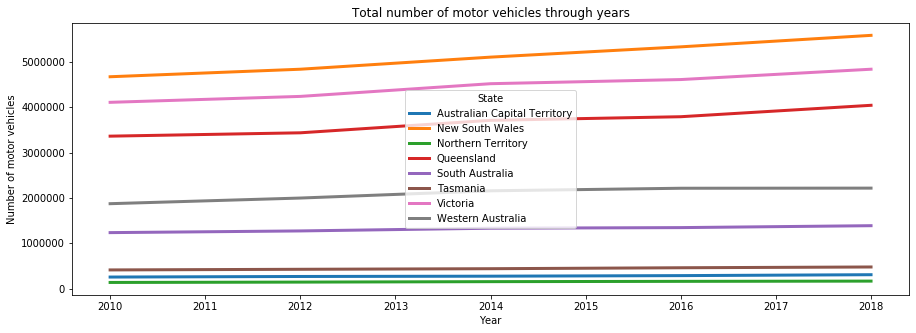

In [19]:
num_motor_vehicles.plot(figsize=(15, 5), 
                  title="Total number of motor vehicles through years", 
                  lw=3,  
                  alpha=1).set_ylabel("Number of motor vehicles");

Total number of vehicles in Australia from 2010 to 2018. 

In [20]:
df3[df3['State']=='Australia'].groupby(['Year','State'])['Number_of_vehicles'].sum().unstack()

State,Australia
Year,
2010,16045057.0
2012,16612038.0
2014,17683590.0
2016,18191675.0
2018,19012770.0


Estimation of the total number of vehicles in Australia from 2018 to 2024. 

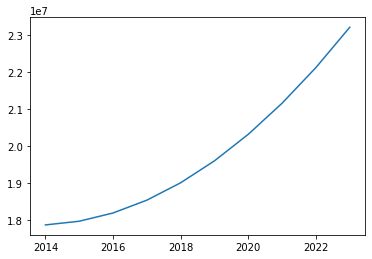

In [23]:
x = np.array([2010, 2012, 2014, 2016, 2018])
y = np.array([16045057.0, 16612038.0, 17683590.0, 18191675.0, 19012770.0])


f = scipy.interpolate.interp1d(x, y, kind='quadratic')

dx = 0.01
x0 = x[-1] - 2*dx
first = scipy.misc.derivative(f, x0, dx=dx, n=1)
second = scipy.misc.derivative(f, x0, dx=dx, n=2)

forecast = lambda x_new: np.poly1d([second/2, first, f(x[-1])])(x_new - x[-1])

xs = np.arange(2014, 2024)
ys = forecast(xs)

x_formatter = matplotlib.ticker.ScalarFormatter()  
plt.gca().xaxis.set_major_formatter(x_formatter)

plt.plot(xs, ys)

In [24]:
total_motor_km = df3[df3['State']!='Australia'].pivot_table('Total kilometres travelled', index='Year', columns='State', aggfunc=sum)

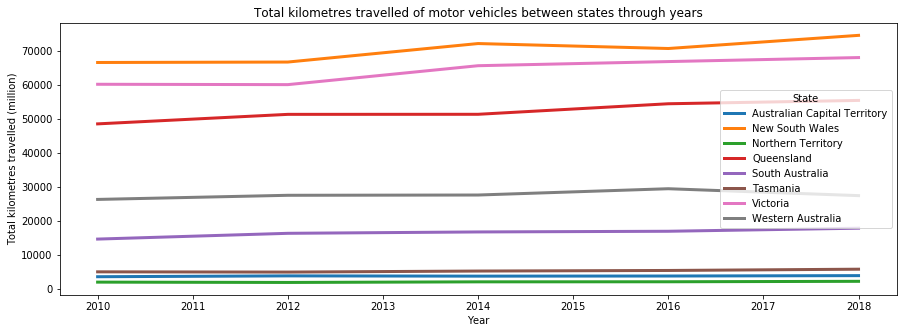

In [25]:
total_motor_km.plot(figsize=(15, 5), 
                  title="Total kilometres travelled of motor vehicles between states through years", 
                  lw=3,  
                  alpha=1).set_ylabel("Total kilometres travelled (million)");

Total kilometres travelled (million) of motor vehicles between states through years.

In [26]:
df3[df3['State']!='Australia'].groupby(['Year','State'])['Total kilometres travelled'].sum().unstack()

State,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
Year,,,,,,,,
2010,3539.0,66581.0,1949.0,48517.0,14615.0,4975.0,60171.0,26285.0
2012,3787.0,66712.0,1854.0,51317.0,16312.0,4904.0,60066.0,27500.0
2014,3709.0,72154.0,2032.0,51337.0,16716.0,5208.0,65633.0,27581.0
2016,3746.0,70696.0,2053.0,54437.0,16915.0,5380.0,66850.0,29434.0
2018,3860.0,74566.0,2185.0,55419.0,17817.0,5753.0,68030.0,27401.0


Total kilometres travelled (million) of motor vehicles in Australia through years.

In [27]:
df3[df3['State']=='Australia'].groupby(['Year','State'])['Total kilometres travelled'].sum().unstack()

State,Australia
Year,
2010,226632.0
2012,232453.0
2014,244369.0
2016,249512.0
2018,255031.0


Estimation of the total kilometres travelled in Australia from 2018 to 2024. 

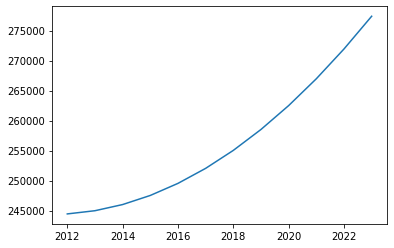

In [28]:
x = np.array([2010, 2012, 2014, 2016, 2018])
y = np.array([226632.0, 232453.0, 244369.0, 249512.0, 255031.0])


f = scipy.interpolate.interp1d(x, y, kind='quadratic')

dx = 0.01
x0 = x[-1] - 2*dx
first = scipy.misc.derivative(f, x0, dx=dx, n=1)
second = scipy.misc.derivative(f, x0, dx=dx, n=2)

forecast = lambda x_new: np.poly1d([second/2, first, f(x[-1])])(x_new - x[-1])

xs = np.arange(2012, 2024)
ys = forecast(xs)

x_formatter = matplotlib.ticker.ScalarFormatter()  
plt.gca().xaxis.set_major_formatter(x_formatter)

plt.plot(xs, ys)

Check if the dataset is properly lable

In [29]:
df4 = pd.read_csv(input_path4)
df4.head()

,State,Vehicle_type,Petrol,Petrol - RSE,Diesel,Diesel - RSE,LPG/CNG/dual fuel/hybrid and other,LPG/CNG/dual fuel/hybrid and other - RSE,Total_fuel,Total fuel - RSE
0,New South Wales,Passenger vehicles,4978.0,6.43,755.0,28.59,107.0,29.41,5840.0,5.27
1,New South Wales,Motor cycles,38.0,25.37,0.0,0.00,0.0,0.00,38.0,25.37
2,New South Wales,Light commercial vehicles,447.0,14.34,1302.0,8.09,54.0,71.00,1803.0,6.40
3,New South Wales,Rigid trucks,10.0,39.04,902.0,7.05,0.0,0.00,912.0,7.00
4,New South Wales,Articulated trucks,0.0,0.00,981.0,3.72,0.0,0.00,981.0,3.72


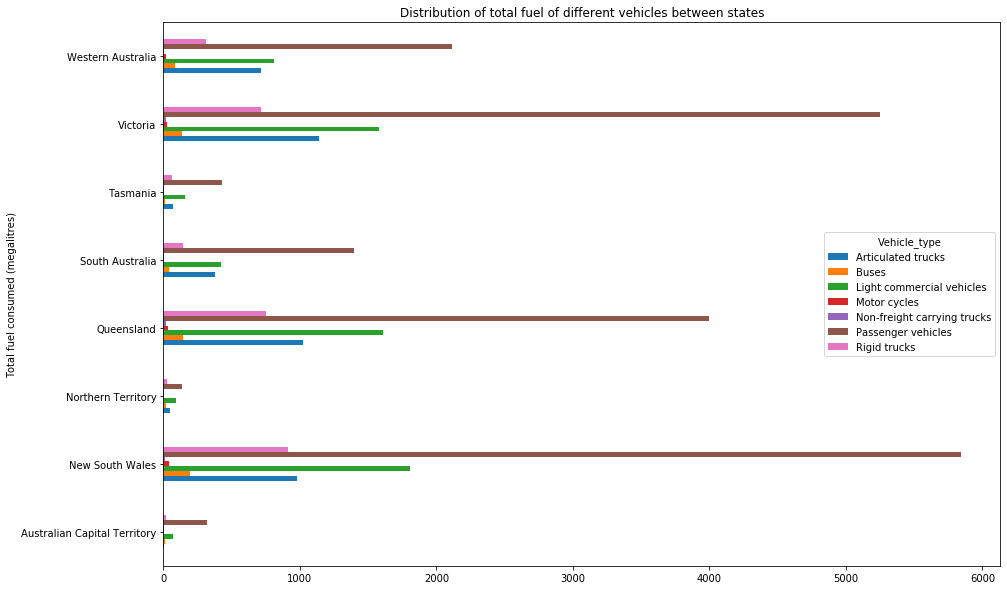

In [30]:
dist5 = df4[df4['State']!='Australia'].groupby(['State','Vehicle_type'])['Total_fuel'].sum().unstack()
g5 = dist5.plot(kind='barh',figsize = (15,10),title = "Distribution of total fuel of different vehicles between states").set_ylabel("Total fuel consumed (megalitres)")

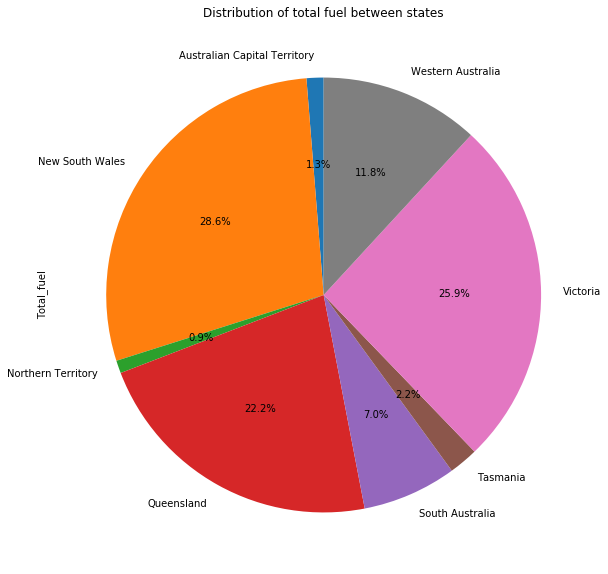

In [31]:
dist6 = df4[df4['State']!='Australia'].groupby(['State']).Total_fuel.sum()
p = dist6.plot(kind='pie', autopct='%1.1f%%',startangle=90,figsize = (25,10),title = "Distribution of total fuel between states")

Total fuel consumed (megalitres) in every state

In [32]:
df4[df4['State']!='Australia'].groupby(['State']).Total_fuel.sum()

State
Australian Capital Territory     432.0
New South Wales                 9782.0
Northern Territory               324.0
Queensland                      7580.0
South Australia                 2394.0
Tasmania                         743.0
Victoria                        8865.0
Western Australia               4049.0
Name: Total_fuel, dtype: float64

Total fuel consumed (megalitres) in Australia

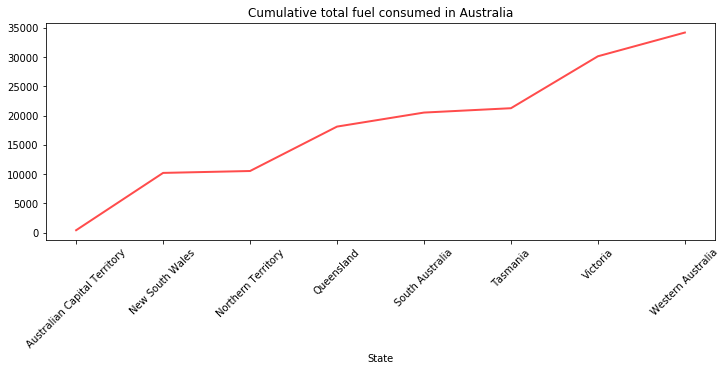

In [33]:
bar=df4[df4['State']!='Australia'].groupby(['State']).Total_fuel.sum().cumsum()
b = bar.plot(figsize=(12, 4), title="Cumulative total fuel consumed in Australia", lw=2, color=('r'), alpha=0.7).tick_params(axis="x", rotation=45)

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>

In Australia, light commercial vehicles reached the highest total travelled kilometres through years compared with freight use vehicle.

According to total travelled kilometres of motor vehicles analysis, passenger vehicles have reached an outstanding record compared to other vehicles types.

In comparison with the total fuel consumption of different vehicles in different States, passenger vehicles also have reached a dramatic record. 

The amount of fuel consumed is also increased according to the total travelled kilometres across states and between different vehicles. However, larger vehicles consumed much more fuel compared to the smaller one.

Through years, the total number of motor vehicles NSW is much more than any other State with 5586547.0 in 2018. This was followed by Victoria (4839222.0), Queensland (4043013.0) and Western Australia (2215147.0). Also, the total number of motor vehicles is increased every year across the States

Estimation of the total number of vehicles and total kilometres travelled of vehicles in Australia from 2018 to 2024 has been done by the quadratic model. The prediction is depending on the data in the past, so we able to prepare the fuel, and the vehicles in advance.









<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In hindsight...</h1>

<ul>
    <li> I was a bit struggle in cleaning data when I first got the datasets since I only have been deal with clean datasets before. Also, I have to fix the datatypes depending on my purpose of analysis. For example, States need to be categorical datatype.</li>
    <li> In my opinion, times series is a beneficial type of graph that I could make any comparison of States through different years.
        When it comes to many categorical values, the bar chart will look confusing. Therefore, the pie chart or time series will improve the presentation of the analysis.
            I also have learned how to make prediction the future based the data in the past by using NumPy and Spicy package</li>
    <li>  I able to reach the total number of vehicles, total kilometres travelled, and the fuel consumption of vehicles between different States and in the different year. From there, I able to predict the future. And from there, we able to prepare enough vehicles and fuel for every States across Australia.  </li>
    <li> The surprising knowledge or insight is that I able to clean data so I could present the analyses. Secondly, the power of time series graph is much stronger than I thought. Lastly, I could try to predict data, although in a straightforward way.</li>
    <li> If I have a chance to redo the work, i will try to understand the data better. Also, try to use many other sheets in the excel file. My advice for someone who would want to work on a similar problem is that do as much analysis as he/she could. Try to predict future trend under any topic, and to make the report easy for everyone to follow.</li>
    <li> I will try to do more graphs and analysis. Also will go in deeper in prediction analysis</li>

</ul>